In [1]:
# All written in R

In [1]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
install.packages("stm")

also installing the dependencies ‘coda’, ‘extrafontdb’, ‘Rttf2pt1’, ‘RcppEigen’, ‘statnet.common’, ‘reticulate’, ‘ISOcodes’, ‘extrafont’, ‘fastmatch’, ‘ggrepel’, ‘network’, ‘RSpectra’, ‘RcppParallel’, ‘sna’, ‘SnowballC’, ‘spacyr’, ‘stopwords’, ‘proxyC’, ‘matrixStats’, ‘slam’, ‘lda’, ‘quanteda’, ‘glmnet’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [3]:
install.packages("devtools")

also installing the dependencies ‘rex’, ‘crosstalk’, ‘covr’, ‘DT’, ‘ellipsis’, ‘rversions’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [4]:
setwd('../../nowdata/')

ERROR: Error in setwd("../../nowdata/"): cannot change working directory


In [8]:
getwd()

[1] "/home/jovyan/work/nowdata"

In [1]:
data <- read.csv('charters_textfiltered_2015.csv') #read in the csv file
data <- data[complete.cases(data$poor_students),] #select rows that are not null values in poor_students covariate
data <- data[complete.cases(data$students_ofcolor), ] #select rows that are not null values in students_ofcolor covariate
data <- sample_n(data, 1000)  #sample 100 rows from the data frame (because it was too slow using all the docs)

Warning message in file(file, "rt"):
“cannot open file 'charters_textfiltered_2015.csv': No such file or directory”

ERROR: Error in file(file, "rt"): cannot open the connection


In [10]:
str(data)

'data.frame':	1000 obs. of  66 variables:
 $ master_string          : Factor w/ 5367 levels "                         parent involvement policy as required section bb esea parent involvement means partici"| __truncated__,..: 261 3310 2982 4739 2995 5080 3161 4448 2049 1247 ...
 $ inquiry_ideology       : num  0.00481 0.00226 0.00333 0.00262 0.0052 ...
 $ readingblur_2013       : num  5 1 NA 1 5 5 5 1 1 1 ...
 $ mathblur_2013          : num  5 5 NA NA 5 5 5 1 1 1 ...
 $ readingscore_2013      : num  87 91 NA 40 62 92 42 42 33 63 ...
 $ mathscore_2013         : num  67 92 NA NA 52 44 42 45 21 65 ...
 $ readingblur_2014       : num  5 1 5 1 1 1 5 1 1 1 ...
 $ mathblur_2014          : num  5 5 5 1 1 1 5 1 1 1 ...
 $ readingscore_2014      : num  47 91 32 43 68 15 62 36 30 51 ...
 $ mathscore_2014         : num  62 97 32 43 58 5 42 6 22 25 ...
 $ readingblur_2015       : num  5 1 5 1 1 1 5 1 1 1 ...
 $ mathblur_2015          : num  5 10 5 1 1 1 5 1 1 1 ...
 $ readingscore_2015      : num  5

In [11]:
library('stm')

stm v1.3.3 (2018-1-26) successfully loaded. See ?stm for help. 
 Papers, resources, and other materials at structuraltopicmodel.com


In [12]:
install.packages("tm")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [11]:
#process the documents 
processed <- textProcessor(data$master_string, metadata = data)

Building corpus... 
Converting to Lower Case... 
Removing punctuation... 
Removing stopwords... 
Removing numbers... 
Stemming... 
Creating Output... 


In [12]:
processed

A text corpus with 1000 documents, and an 49557 word dictionary.

In [13]:
#remove terms due to frequency threshold, separated into docs, vocab, and meta
out <- prepDocuments(processed$documents, processed$vocab, processed$meta)

Removing 30537 of 49557 terms (30537 of 599375 tokens) due to frequency 
Your corpus now has 1000 documents, 19020 terms and 568838 tokens.

In [14]:
docs <- out$documents
vocab <- out$vocab
meta <- out$meta

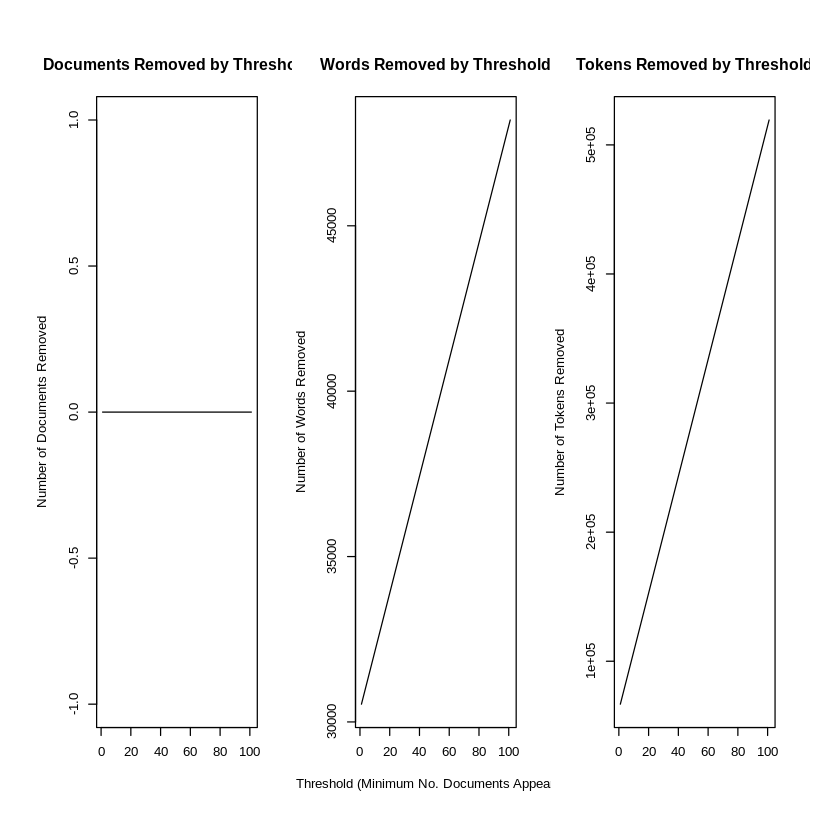

In [15]:
plotRemoved(processed$documents, lower.thresh = seq(1, 200, by = 100))

In [16]:
install.packages(c("Rtsne", "rsvd", "geometry"))

also installing the dependencies ‘abind’, ‘magic’, ‘lpSolve’, ‘linprog’, ‘RcppProgress’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [17]:
library("Rtsne")
library("rsvd")
library("geometry")

In [18]:
#Model estimation using Spectral initialization with K = 0 will give a good starting point for which K to use
charterPrevFit <- stm(documents = docs, vocab = vocab, K = 0, prevalence =~ poor_students + students_ofcolor, max.em.its = 25, data = meta, init.type = "Spectral")




Beginning Spectral Initialization 
	 Calculating the gram matrix...
	 Using only 10000 most frequent terms during initialization...
	 Finding anchor words...
 		 Initializing tSNE with PCA...
 		 Using tSNE to project to a low-dimensional space...
 		 Calculating exact convex hull...
 	
	 Recovering initialization...
 	....................................................................................................
Initialization complete.
....................................................................................................
Completed E-Step (12 seconds). 
Completed M-Step. 
Completing Iteration 1 (approx. per word bound = -7.216) 
....................................................................................................
Completed E-Step (9 seconds). 
Completed M-Step. 
Completing Iteration 2 (approx. per word bound = -6.931, relative change = 3.958e-02) 
....................................................................................................
Comp

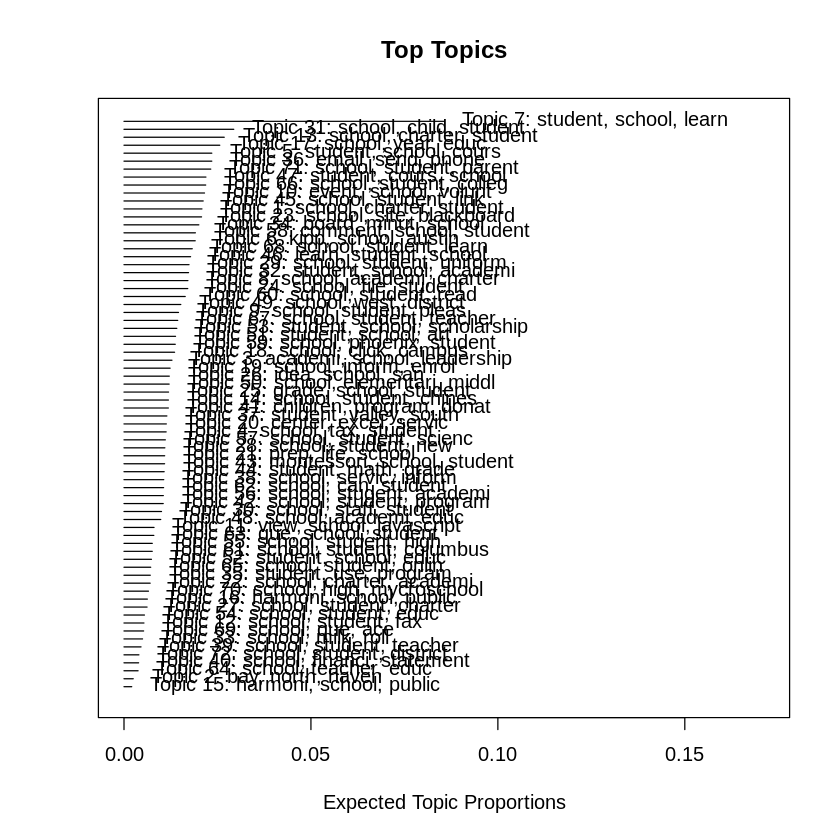

In [19]:
plot.STM(charterPrevFit)

In [20]:
#Provides data on the different models produced by values of K = 5,10,20
charterSearch <- searchK(documents = out$documents, vocab = out$vocab, K = c(5, 10, 20), prevalence =~ poor_students + students_ofcolor, data = meta)

Beginning Spectral Initialization 
	 Calculating the gram matrix...
	 Using only 10000 most frequent terms during initialization...
	 Finding anchor words...
 	.....
	 Recovering initialization...
 	....................................................................................................
Initialization complete.
....................................................................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 1 (approx. per word bound = -7.505) 
....................................................................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 2 (approx. per word bound = -7.332, relative change = 2.307e-02) 
....................................................................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 3 (approx. per word bound = -7.315, relative change = 2.

In [21]:
knitr::kable(charterSearch$results)



|  K|   exclus|    semcoh|   heldout| residual|     bound|    lbound| em.its|
|--:|--------:|---------:|---------:|--------:|---------:|---------:|------:|
|  5| 8.095822| -15.65034| -7.334272| 6.467003| -15179034| -15179029|     60|
| 10| 8.846149| -20.35557| -7.255918| 4.902259| -14966440| -14966425|     63|
| 20| 9.270977| -28.05539| -7.173886| 4.102146| -14671365| -14671323|     58|

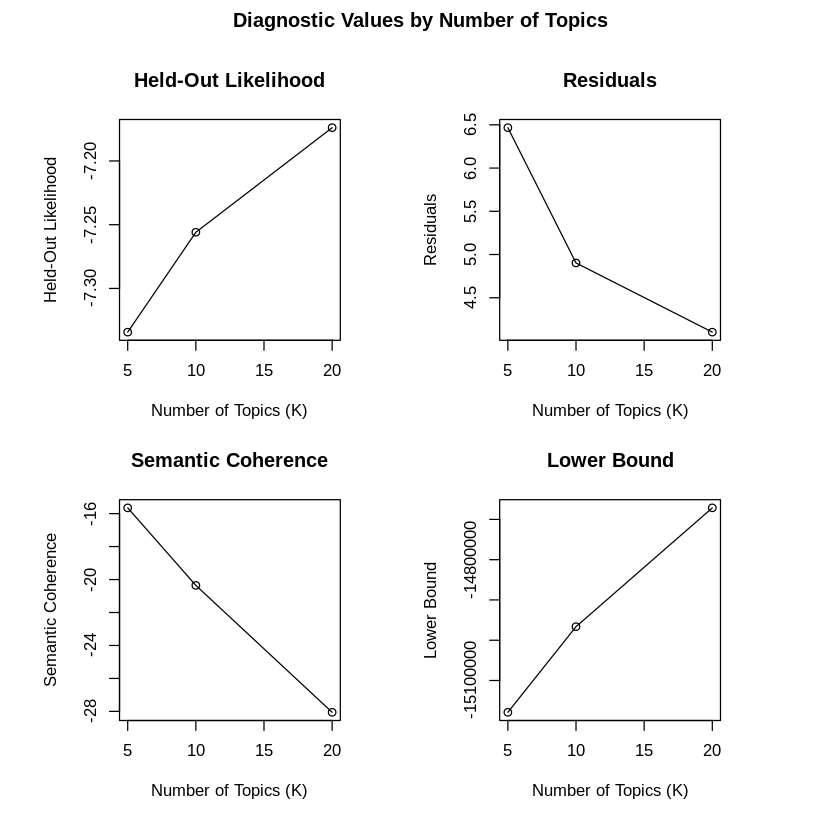

In [22]:
plot(charterSearch)

In [23]:
charterSelect <- selectModel(docs, vocab, 15, prevalence =~ poor_students + students_ofcolor, data=meta, runs=20)

Casting net 
1 models in net 
2 models in net 
3 models in net 
4 models in net 
5 models in net 
6 models in net 
7 models in net 
8 models in net 
9 models in net 
10 models in net 
11 models in net 
12 models in net 
13 models in net 
14 models in net 
15 models in net 
16 models in net 
17 models in net 
18 models in net 
19 models in net 
20 models in net 
Running select models 
1 select model run 
Beginning LDA Initialization 
....................................................................................................
Completed E-Step (3 seconds). 
Completed M-Step. 
Completing Iteration 1 (approx. per word bound = -7.327) 
....................................................................................................
Completed E-Step (3 seconds). 
Completed M-Step. 
Completing Iteration 2 (approx. per word bound = -7.324, relative change = 3.493e-04) 
....................................................................................................
Completed E-Ste

In [24]:
charterSelect

$runout
$runout[[1]]
A topic model with 15 topics, 1000 documents and a 19020 word dictionary.

$runout[[2]]
A topic model with 15 topics, 1000 documents and a 19020 word dictionary.

$runout[[3]]
A topic model with 15 topics, 1000 documents and a 19020 word dictionary.

$runout[[4]]
A topic model with 15 topics, 1000 documents and a 19020 word dictionary.


$semcoh
$semcoh[[1]]
 [1] -40.82512 -13.66183 -12.28505 -18.16442 -20.83525 -50.92424 -14.90476
 [8] -52.73087 -35.31967 -14.14153 -17.19850 -22.22417 -11.30463 -18.62185
[15] -18.97031

$semcoh[[2]]
 [1] -11.050169 -14.528444 -29.460388  -9.958433 -15.134040 -13.264456
 [7] -17.989949 -51.306047 -14.951052  -9.679907 -40.884334 -18.469496
[13] -49.229993 -51.313672 -20.599365

$semcoh[[3]]
 [1] -30.826446 -15.640842  -9.835328 -21.404511 -13.046632 -45.121730
 [7] -18.814488 -18.576717 -46.563772 -29.768089 -18.160316  -7.921504
[13] -12.071400 -11.172479 -61.304614

$semcoh[[4]]
 [1] -11.691719 -39.240645 -58.650863 -31.803972 -1

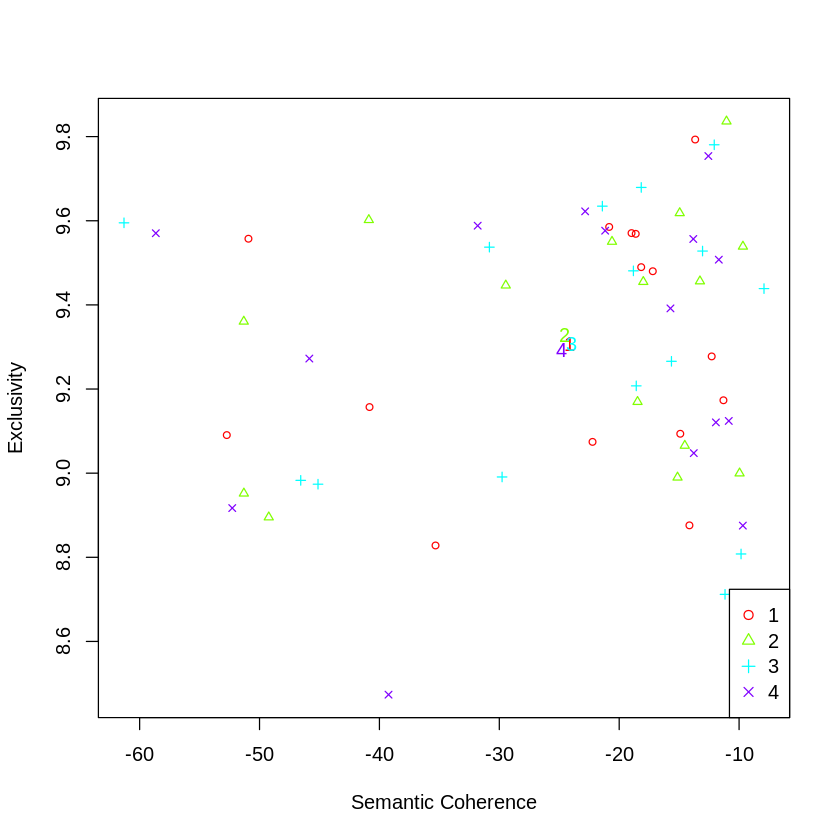

In [25]:
plotModels(charterSelect, pch=c(1,2,3,4), legend.position="bottomright")

In [26]:
selected1 <- charterSelect$runout[[1]]
selected1

A topic model with 15 topics, 1000 documents and a 19020 word dictionary.

In [27]:
#Exclusivity and semantic coherence metrics for the model selected from selectModel()
ex1 <- exclusivity(selected1, M=10, frexw=.7)
semcoh1 <- semanticCoherence(selected1, docs, M=10)
mean(ex1)
mean(semcoh1)

[1] 9.307681

[1] -24.14081

In [28]:
install.packages("igraph")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


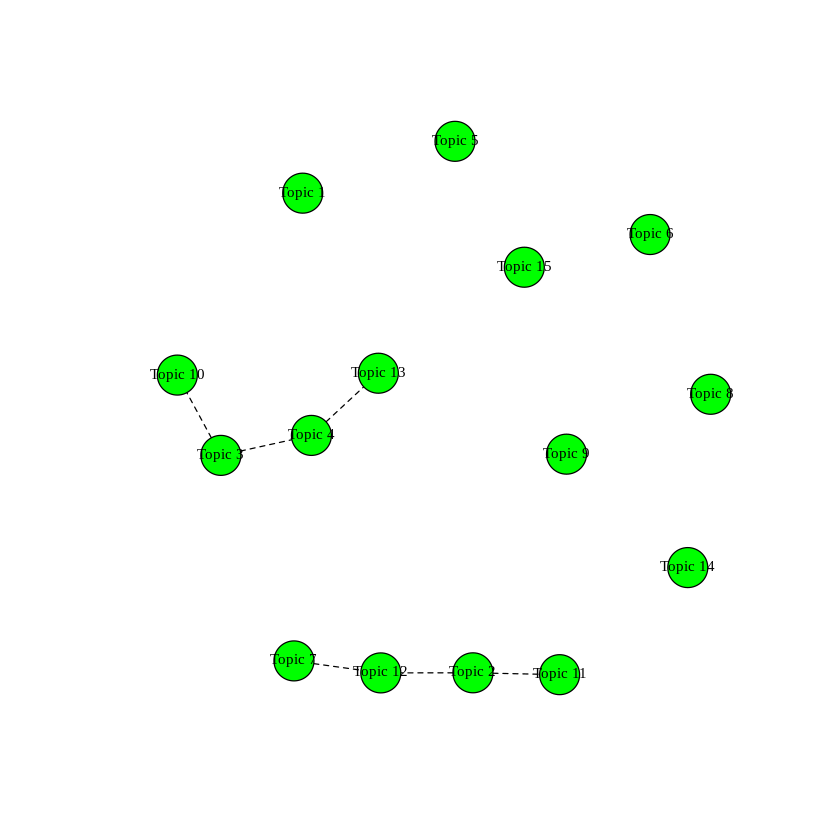

In [29]:
#Plot of topic correlation using the first selected model
topicCor1 <- topicCorr(selected1)
plot(topicCor1)